# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.stem import PorterStemmer

num_words = 20000
max_len = 15

# Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Graduation_Project

/content/drive/MyDrive/Graduation_Project


In [4]:
!pwd

/content/drive/MyDrive/Graduation_Project


In [5]:
data = pd.read_csv('train.csv')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Exploring the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
# percentage of missing data in each feature

data.isnull().sum() * 100 / len(data)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [8]:
# finding how many data in each class

data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# top 15 locations in the data

data['location'].value_counts()[:15].index.tolist()

['USA',
 'New York',
 'United States',
 'London',
 'Canada',
 'Nigeria',
 'UK',
 'Los Angeles, CA',
 'India',
 'Mumbai',
 'Washington, DC',
 'Kenya',
 'Worldwide',
 'Australia',
 'Chicago, IL']

In [10]:
# top 15 keywords in the data

data['keyword'].value_counts()[:15].index.tolist()

['fatalities',
 'deluge',
 'armageddon',
 'sinking',
 'damage',
 'harm',
 'body%20bags',
 'outbreak',
 'evacuate',
 'fear',
 'collided',
 'siren',
 'twister',
 'windstorm',
 'sinkhole']

# Removing unneeded columns

In [11]:
data = data.drop(['location', 'keyword', 'id'], axis=1)
data

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


# Data Cleaning

In [12]:
def cleanText(text):
    text=re.sub(r'#\S*','',text)  #  remove hashtag
    text=re.sub(r'@\S*','',text)  # remove user name 
    text=re.sub(r'https?:\/\/\S+','',text)  #remove hyperlinks
    text=re.sub('\d+','',text)  # remove digits
    text=re.sub(r'\W',' ',text) # remove emotions
    text=re.sub(r'^\s+','',text)  # remove space in front of text 
    text=re.sub(r'\s+$','',text)  # remove space in tail text
    return text

In [13]:
# split the text

def tokenization(text):
  tokens = re.split('\W+',text)
  return tokens

In [14]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  stopwordsFree = [word for word in text if word not in stopwords]
  
  return stopwordsFree

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def stemming(text):
  ps = PorterStemmer()
  output = [ps.stem(word) for word in text]

  return output

In [16]:
def process_data(text):
  clean_text = cleanText(text)
  clean_text = clean_text.lower()
  token = tokenization(clean_text)
  stopwords_free = remove_stopwords(token)
  output = stemming(stopwords_free)

  return output

In [17]:
# finding most common words & stopwords

sentences = data['text']

sentences = sentences.apply(lambda x: cleanText(x))
sentences = sentences.apply(lambda x: x.lower())
sentences = sentences.apply(lambda x: tokenization(x))

all_words = {}
all_stopwords = {}

for sentence in sentences:
  for word in sentence:

    if word not in stopwords:
      if word not in all_words:
        all_words[word] = 1
      else:
        all_words[word] += 1

    else:
      if word not in all_stopwords:
        all_stopwords[word] = 1
      else:
        all_stopwords[word] += 1

most_common_words = [key for key, value in all_words.items() if value == max(all_words.values())]
most_common_stopwords = [key for key, value in all_stopwords.items() if value == max(all_stopwords.values())]

print("Most common word is :", most_common_words[0])
print("Most common stopword is :", most_common_stopwords[0])

Most common word is : like
Most common stopword is : the


In [18]:
data['clean_text'] = data['text'].apply(lambda x: process_data(x))

data.head(50)

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,"[peopl, receiv, evacu, order, california]"
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, rubi, smoke, pour, school]"
5,#RockyFire Update => California Hwy. 20 closed...,1,"[updat, california, hwi, close, direct, due, l..."
6,#flood #disaster Heavy rain causes flash flood...,1,"[heavi, rain, caus, flash, flood, street, mani..."
7,I'm on top of the hill and I can see a fire in...,1,"[top, hill, see, fire, wood]"
8,There's an emergency evacuation happening now ...,1,"[emerg, evacu, happen, build, across, street]"
9,I'm afraid that the tornado is coming to our a...,1,"[afraid, tornado, come, area]"


# Preparing train, val and test data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(data['clean_text'], data['target'], test_size=0.15, random_state=22)
print(X_train.shape)
print(X_val.shape)

(6471,)
(1142,)


In [20]:
test_data = pd.read_csv('test.csv')
X_test = test_data['text']

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

toknizer=Tokenizer(num_words=num_words)
toknizer.fit_on_texts(X_train)
train_sequences = toknizer.texts_to_sequences(X_train)
print(train_sequences)

[[68, 912, 286, 85, 368, 10, 12, 604, 168, 63, 1111, 110], [453, 1424, 3104], [434, 4367, 858, 243, 2494, 586, 243, 268, 586, 258], [1, 14, 648, 1616, 304], [2095, 4368, 859, 123, 3105, 1112, 4369, 563, 207], [218, 4370, 3106, 2096, 412, 4371, 605, 759, 287, 77, 3107, 519, 92], [169, 4372, 1113, 305, 3108, 3109, 27, 4373, 394, 3110, 351, 4374, 649, 1425, 1046, 120, 4375, 435, 351, 860], [2097, 1821, 1426, 1427, 436, 321, 121, 973, 760, 16, 1428, 21, 116, 801], [173, 494, 61, 68, 1617, 1047], [650, 587, 606, 495, 219, 306, 413], [4376, 3111, 974, 28, 93, 334, 1048, 4377, 4378, 4379, 454], [220, 72, 761, 288, 975], [104, 289], [58, 3, 2, 1618, 976, 33], [56, 395, 174, 38, 519, 1429, 29, 3112], [455, 2495, 1822, 606], [218, 1823, 1295, 4380, 117, 307, 414, 322, 1295, 3, 913, 251, 2098, 2099, 4381, 335, 1049], [651, 1430, 2100, 1050, 4382, 607, 175, 762], [114, 861, 2101, 36, 69, 763, 2102, 232, 107, 3, 2103, 680], [369, 652, 259, 186, 259], [41, 14, 4383, 4384, 1619, 2104, 198, 244, 4385,

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_train_sequence=pad_sequences(train_sequences, truncating='post', maxlen=max_len)
print(padded_train_sequence)

[[   0    0    0 ...   63 1111  110]
 [   0    0    0 ...  453 1424 3104]
 [   0    0    0 ...  268  586  258]
 ...
 [   0    0    0 ...   79 1995  332]
 [   6 4094 2014 ... 9188   55 2467]
 [   0    0    0 ...  197   15  209]]


In [23]:
val_sequences = toknizer.texts_to_sequences(X_val)
test_sequences = toknizer.texts_to_sequences(X_test)

padded_val_sequence = pad_sequences(val_sequences, truncating='post', maxlen=max_len)
padded_test_sequence = pad_sequences(test_sequences, truncating='post', maxlen=max_len)

# Build the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(16))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 32)            12416     
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,295,569
Trainable params: 1,295,569
Non-

In [25]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint.h5', monitor='val_accuracy', save_best_only=True)

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train_sequence,Y_train, batch_size=128, epochs=4, validation_data=(padded_val_sequence, Y_val), callbacks=[model_checkpoint_callback])

Epoch 1/4
51/51 [==============================] - 13s 59ms/step - loss: 0.6698 - accuracy: 0.5770 - val_loss: 0.6180 - val_accuracy: 0.6883
Epoch 2/4
51/51 [==============================] - 1s 11ms/step - loss: 0.5024 - accuracy: 0.7929 - val_loss: 0.4840 - val_accuracy: 0.7776
Epoch 3/4
51/51 [==============================] - 0s 9ms/step - loss: 0.3399 - accuracy: 0.8710 - val_loss: 0.4964 - val_accuracy: 0.7785
Epoch 4/4
51/51 [==============================] - 0s 9ms/step - loss: 0.2462 - accuracy: 0.9155 - val_loss: 0.5717 - val_accuracy: 0.7802


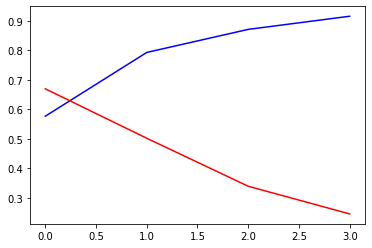

In [26]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['loss'], 'r')

# Test the model

In [27]:
predictions = model.predict(padded_test_sequence)
predictions = predictions.round()
predictions[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# Save model

In [28]:
model.save('model.h5')